In [201]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax, array
from tensorflow.python.lib.io import file_io
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [202]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_test = np_utils.to_categorical(y_test)
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx] 

#print(x_test)
#print(y_test)
#print(xhat.tolist())
timesteps = 40
timesteps_in_future = 20
#train_file = '../MoviLabData/No_Overlap_LJY_Exercise_features.csv'
train_file = '../MoviLabData/No_Overlap_Total_Exercise_features.csv'
#train_file = '../MoviLabData/Learning_xin_jaeyeong.csv'
#train_file = '../MoviLabData/TEST_DATA/TEST_ljy_pushup_squat.csv'
train_file = '../MoviLabData/TEST_DATA/Test_ExerciseData_by_dagon.csv'

#train_file = '../MoviLabData/Learning_xin_jaeyeong_minzy_dagon_situp.csv'
train_file = '../MoviLabData/TEST_DATA/test_mz_squat_features.csv'


#file load
file_stream = file_io.FileIO(train_file, mode='r')
dataframe = read_csv(file_stream, header=0)
dataframe.fillna(0,inplace=True)
dataset = dataframe.values

X = dataset[:, [
    2, 3, 4, 5, 6, 7, 8, 9, 10, 11
    ]].astype(float)

y = dataset[:,0]

In [203]:
# data parameters
data_dim = X.shape[1]
num_classes = len(set(y))
type_classes = list(set(y))
# scale X
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

In [204]:
# encode Y
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
hot_encoded_y = np_utils.to_categorical(encoded_y)
print(y)
print(encoded_y)
Y = sorted(list(set(y)))
print(Y)



['squat' 'squat' 'squat' ... 'squat' 'squat' 'squat']
[0 0 0 ... 0 0 0]
['squat']


In [205]:
# prepare data for LSTM
def create_LSTM_dataset(x,y,timesteps) :
    dataX, dataY = [], []
    for i in range(len(x) - timesteps + 1) :
        dataX.append(x[i : i + timesteps, :])
        dataY.append(y[i + timesteps - timesteps_in_future -1, :])
    return array(dataX), array(dataY)
X, hot_encoded_y = create_LSTM_dataset(X,hot_encoded_y,timesteps)

In [206]:
from keras.models import load_model
model = load_model('best_weights.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
accelerations (Conv1D)       (None, 19, 32)            992       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 17, 32)            3104      
_________________________________________________________________
lstm_1 (LSTM)                (None, 17, 32)            8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
_________________________________________________________________
scores (Activation)          (None, 3)                 0         
Total para

In [207]:
# Predict 
yhat = model.predict_classes(X)
pro = model.predict_proba(X)
answer = []
for i in hot_encoded_y :
    answer.append(*np.where(i==1)[0])
    
for i in yhat :
    print(i)

0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


accuracy_score :  0.030380673499267936
[[  83 2649]
 [   0    0]]


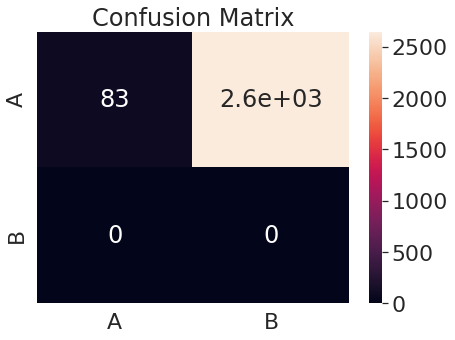

In [213]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
sns.set(font_scale=2)


#print(classification_report(answer, yhat,target_names = Y))
print('accuracy_score : ',accuracy_score(answer,yhat))

arr = confusion_matrix(answer, yhat)
print(arr)
try :
    df_cm = DataFrame(arr,index=[i for i in "AB"], columns = [i for i in "AB"])
except :
    df_cm = DataFrame(arr,index=[i for i in "ABC"], columns = [i for i in "ABC"])

plt.figure(figsize = (7,5))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
